In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import linear_model
from sklearn import datasets
from scipy import linalg as LA
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
clf = linear_model.LinearRegression()

In [152]:
df = pd.read_csv("data.csv")
df = df.drop(0)
df = df.drop(["date","ave2","ave3","high2","high3","low2","low3","rain3","rain4"],axis=1)
df.columns = ["ave","high","low","rain1","rain2"]

In [153]:
df

,ave,high,low,rain1,rain2
1,7.4,13.3,2.6,0.0,0.0
2,7.6,13.1,2.0,0.0,0.0
3,8.6,12.3,4.9,0.0,0.0
4,6.9,12.2,2.7,0.0,0.0
5,5.8,9.8,2.8,0.0,1.0
6,4.9,9.5,1.8,0.0,1.0
7,5.4,11.5,0.1,0.0,1.0
8,4.4,6.1,3.0,13.5,0.0
9,8.1,14.0,4.6,0.0,0.0
10,7.4,12.0,3.6,0.0,0.0


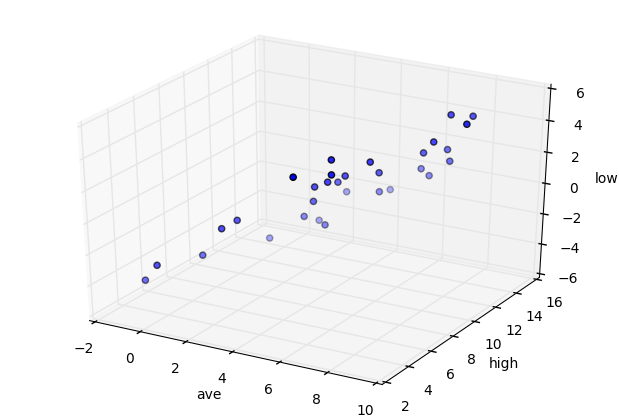

In [117]:
fig = plt.figure()
ax = Axes3D(fig)

ave = df["ave"]
high = df["high"]
low = df["low"]
ax.scatter3D(ave,high,low)
ax.set_xlabel("ave")
ax.set_ylabel("high")
ax.set_zlabel("low")

In [131]:
model_ols = pd.ols(y = df["rain1"],x = df.drop(["rain1"],axis = 1))
print(model_ols)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ave> + <high> + <low> + <intercept>

Number of Observations:         31
Number of Degrees of Freedom:   4

R-squared:         0.2102
Adj R-squared:     0.1225

Rmse:              2.3845

F-stat (3, 27):     2.3959, p-value:     0.0902

Degrees of Freedom: model 3, resid 27

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           ave     0.9788     1.0296       0.95     0.3502    -1.0392     2.9967
          high    -0.8842     0.5011      -1.76     0.0889    -1.8663     0.0979
           low    -0.0563     0.5675      -0.10     0.9217    -1.1685     1.0559
     intercept     4.7086     1.6423       2.87     0.0079     1.4897     7.9276
---------------------------------End of Summary--------------

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [164]:
print(model_ols.predict())

1     0.045350
2     0.451707
3     1.974613
4     0.522956
5     1.562758
6     1.003412
7    -0.179923
8     3.452756
9    -0.001011
10    1.138523
11    1.980027
12    2.837937
13    0.199750
14    2.475293
15    1.867153
16    1.906361
17    0.134950
18    0.763629
19    0.911681
20    0.733634
21    1.511186
22   -1.527673
23    1.295083
24    1.318702
25   -0.424626
26   -0.700392
27   -1.316319
28   -0.408694
29   -0.180974
30    0.019414
31    1.132738
dtype: float64


In [165]:
predict = pd.read_csv("predict.csv")
predict = predict.drop(0)
predict = predict.drop("date",axis=1)
predict = predict.drop(["ave2","ave3","high2","high3","low2","low3"],axis=1)
#df.columns=["ave","high","low"]

In [159]:
predict

,ave1,high1,low1
1,4.0,8.5,0.3
2,5.8,11.9,0.7
3,6.6,14.2,0.3
4,4.4,5.5,2.5
5,6.2,10.4,2.5
6,3.6,7.5,1.7
7,4.4,9.4,-0.3
8,3.2,4.5,1.9
9,3.6,8.7,0.8
10,1.1,4.3,-1.0


## 相関係数

In [53]:
df.corr()

,ave,high,low,rain1,rain2,high-low
ave,1.000000,0.900155,0.856685,-0.112607,-0.087235,0.321683
high,0.900155,1.000000,0.600501,-0.294823,0.052056,0.679576
low,0.856685,0.600501,1.000000,0.071852,-0.257668,-0.178523
rain1,-0.112607,-0.294823,0.071852,1.000000,-0.201865,-0.428699
rain2,-0.087235,0.052056,-0.257668,-0.201865,1.000000,0.300449
high-low,0.321683,0.679576,-0.178523,-0.428699,0.300449,1.000000


## 基本統計量

In [36]:
df.describe()

,ave,high,low,rain1,rain2
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,4.754839,9.632258,0.983871,0.790323,0.290323
std,2.313416,3.066528,2.286350,2.545500,0.461414
min,-0.400000,2.900000,-3.600000,0.000000,0.000000
25%,3.700000,8.350000,-0.500000,0.000000,0.000000
50%,4.900000,9.800000,1.300000,0.000000,0.000000
75%,6.650000,12.250000,2.700000,0.000000,1.000000
max,8.600000,14.000000,4.900000,13.500000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03dd287128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03dc5b7320>]], dtype=object)

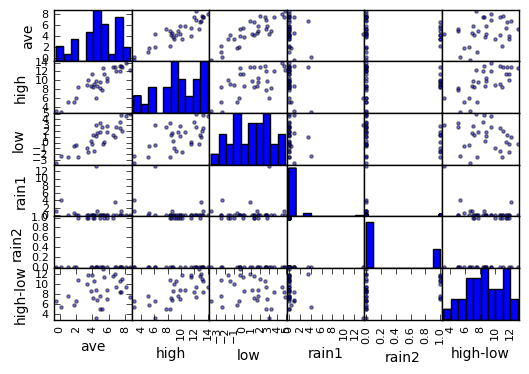

In [56]:
plt.figure()
scatter_matrix(df)

In [65]:
s = pd.Series([1,2,3],index=["a","b","c"])

In [66]:
s.max()

3

In [69]:
s.mean()

2.0

In [71]:
s.apply(lambda x: x*3)

a    3
b    6
c    9
dtype: int64

In [72]:
s.to_json()

'{"a":1,"b":2,"c":3}'

In [74]:
s.to_dict()

{'a': 1, 'b': 2, 'c': 3}